In [63]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
try:
    from data_processing import stock_indic_processing
except:
    os.chdir("./src/")
    from data_processing import stock_indic_processing

In [65]:
(spy, spy_indic_df) = stock_indic_processing('spy')

stocks' directory made
[*********************100%***********************]  1 of 1 completed


In [66]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
1993-03-15,45.06250,45.31250,45.06250,45.31250,26.126835,310800,0.004840
1993-03-16,45.31250,45.43750,45.31250,45.31250,26.126835,30800,0.000000
1993-03-17,45.25000,45.25000,44.96875,45.03125,25.964676,21800,-0.006226
1993-03-18,45.21875,45.50000,45.21875,45.31250,26.126835,59300,0.006226
1993-03-19,45.28125,45.28125,45.03125,45.03125,26.087303,66900,-0.001514


In [67]:
spy_indic_df.head()

,sma5,sma30,std15,std30,H-L,C-O,ewm15,rsi,will_r,sar,adx
Date,,,,,,,,,,,
1993-03-15,45.45000,44.616667,0.619492,0.682680,0.25000,0.25000,44.811189,57.679500,-25.000000,44.681466,14.282526
1993-03-16,45.39375,44.652083,0.525282,0.690517,0.12500,0.00000,44.847421,57.679500,-30.909091,44.812500,13.860064
1993-03-17,45.26250,44.675000,0.480430,0.691339,0.28125,-0.21875,44.860578,53.033487,-49.056604,44.956875,13.080462
1993-03-18,45.21250,44.691667,0.439039,0.700731,0.28125,0.09375,44.892633,56.782391,-32.692308,44.968750,12.491556
1993-03-19,45.20000,44.692708,0.392036,0.701229,0.25000,-0.25000,44.902384,52.287696,-50.980392,44.968750,11.684755


In [68]:
spy_indic_df['sma5'] = (spy_indic_df['sma5']-spy_indic_df['sma5'].shift(1))/spy_indic_df['sma5']
sel_cols = ['sma5', 'std15', 'H-L', 'C-O', 'rsi']
sel_df = spy_indic_df[sel_cols].dropna()
spy = spy[spy.index >= sel_df.index[0]]

In [69]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(sel_df)

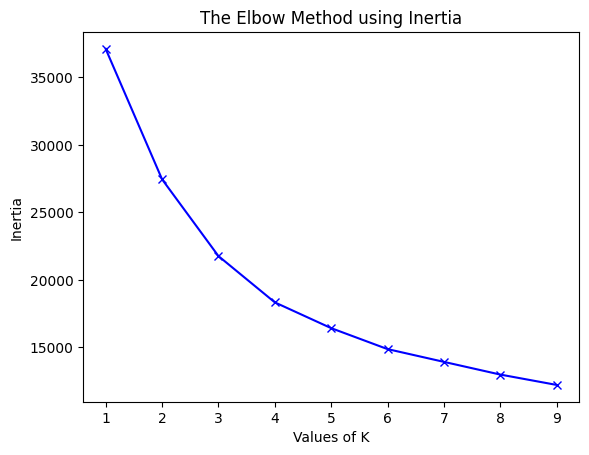

In [70]:
# code adapted from geekforgeeks
inertias = []
K = range(1,10)
for k in range(1, 10):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [71]:
# build kmeans model
n_clusters = 4
km = KMeans(n_clusters=n_clusters,
            init='k-means++', 
            n_init=n_clusters, 
            max_iter=300, 
            random_state=0)

In [80]:
# a plot function
def plot_regimes(df, num_regimes):
    fig = plt.figure(figsize=(25,9))
    colors = sns.color_palette("muted", num_regimes)
    for i in range(0, num_regimes):
        tmp = df[df["state"]==i]['Adj Close']
        tmp = tmp.asfreq('D')
        plt.scatter(tmp.index, tmp, color = colors[i], label=i)
        plt.legend(prop={'size': 15})
    return fig

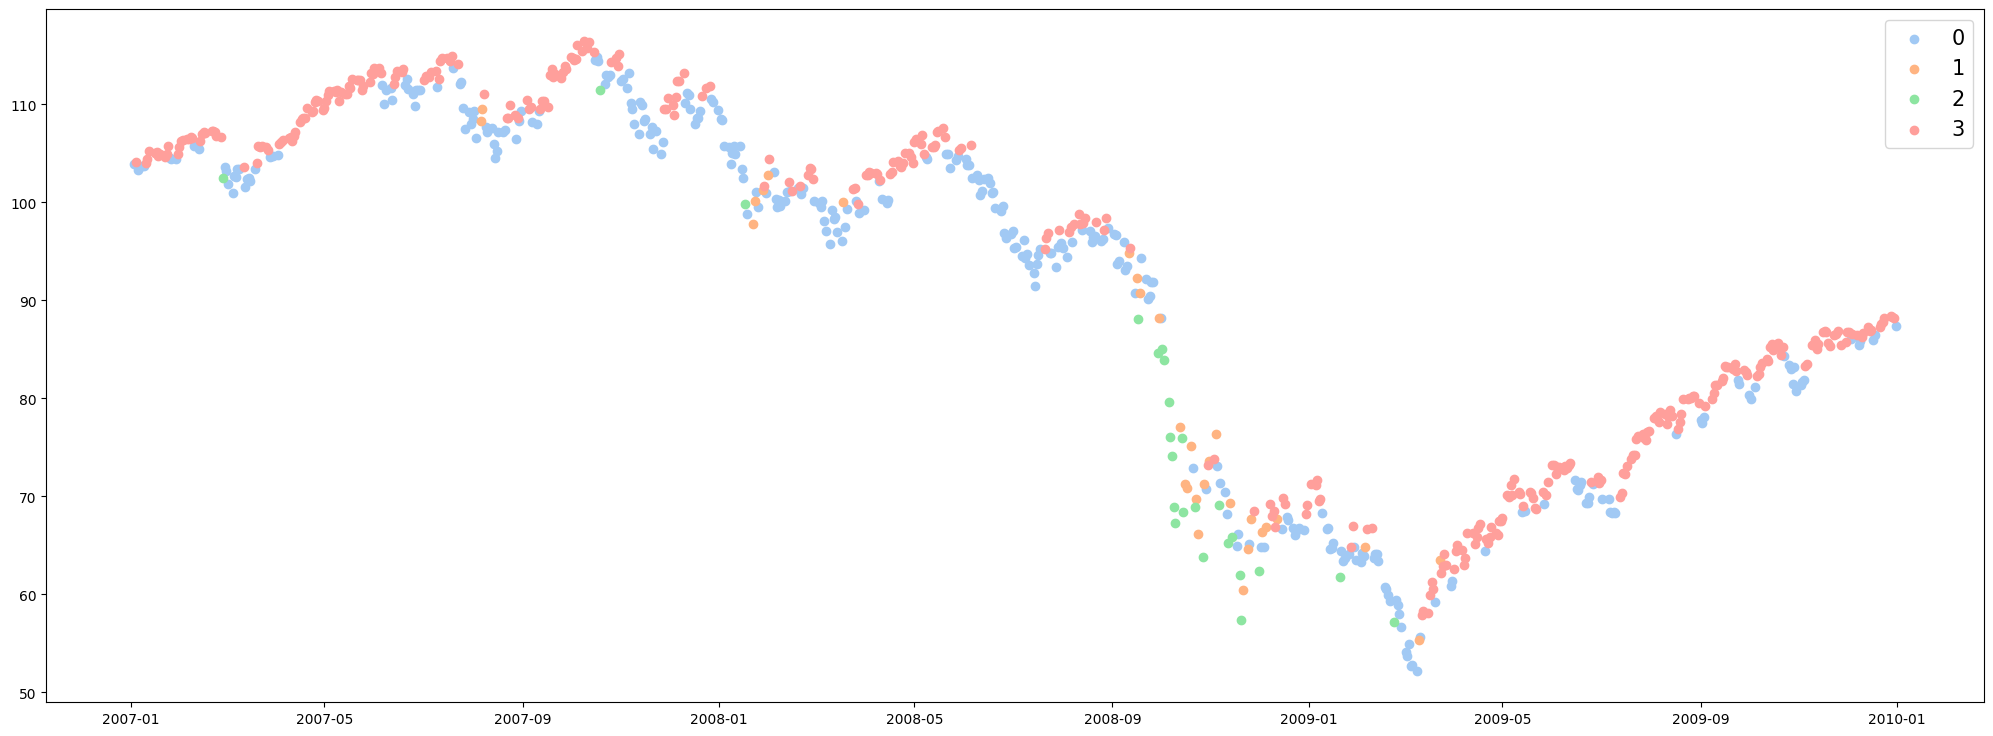

In [82]:
y = km.fit_predict(X)

plot_df = sel_df.copy(deep=True)
plot_df['Adj Close'] = spy['Adj Close']
plot_df['return'] = spy['return']
plot_df['state'] = y

slice_scatter_plot = plot_regimes(plot_df[(plot_df.index>'2007') & (plot_df.index<'2010')], 4)

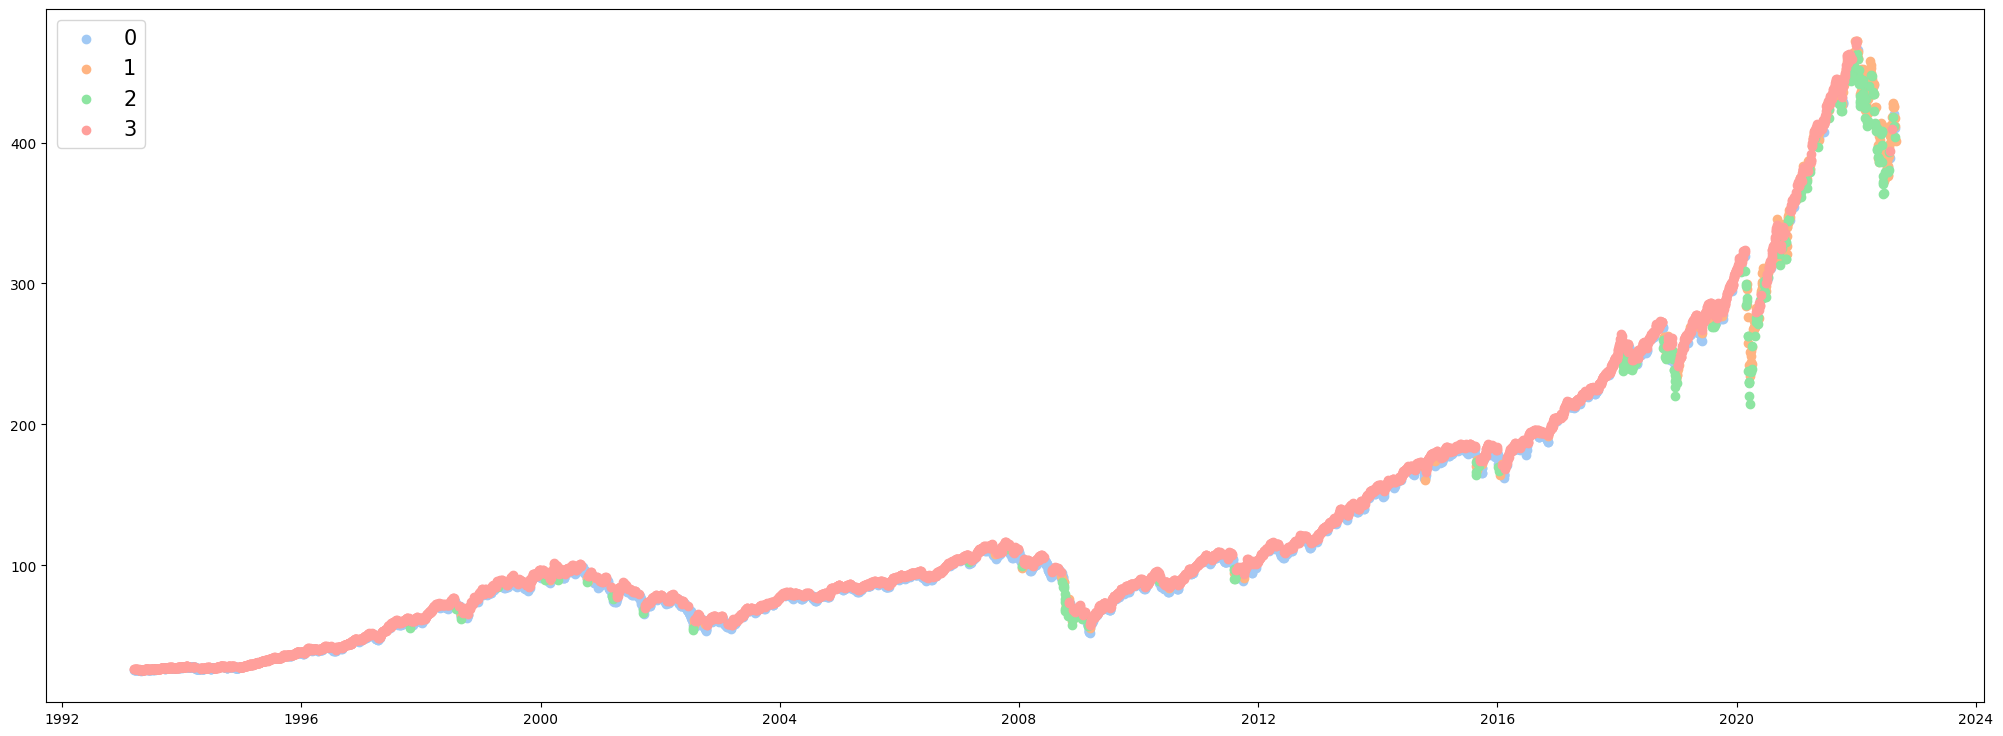

In [83]:
whole_scatter_plot = plot_regimes(plot_df, 4)

In [85]:
plot_df[plot_df["state"]==0].describe()

,sma5,std15,H-L,C-O,rsi,Adj Close,return,state
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.0
mean,-0.003234,1.946686,2.041051,-0.544873,43.801916,107.162020,-0.004335,0.0
std,0.003476,1.189828,1.098742,1.205599,6.628169,70.250381,0.011354,0.0
min,-0.025223,0.137853,0.093750,-4.559998,16.990133,25.145920,-0.053664,0.0
25%,-0.004990,1.145204,1.270004,-1.260010,39.499298,69.939489,-0.010948,0.0
50%,-0.002766,1.712678,1.870007,-0.445000,44.431899,87.464005,-0.003923,0.0
75%,-0.000973,2.513580,2.651564,0.190002,48.626108,111.047289,0.002613,0.0
max,0.007527,8.977545,8.130005,3.300003,63.832406,465.628876,0.043099,0.0


In [86]:
plot_df[plot_df["state"]==1].describe()

,sma5,std15,H-L,C-O,rsi,Adj Close,return,state
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,0.001628,7.281018,5.985748,3.075096,51.164883,298.072485,0.013764,1.0
std,0.006958,3.935918,2.901150,2.393602,10.151579,125.910868,0.018395,0.0
min,-0.027732,1.443586,1.739998,-2.820007,19.721065,55.307095,-0.052046,1.0
25%,-0.002373,4.509096,4.155005,1.699997,43.802894,239.684002,0.003207,1.0
50%,0.001626,6.632930,5.225006,2.928741,50.574410,314.408310,0.011505,1.0
75%,0.005635,8.839065,6.990005,4.047501,58.727076,407.892006,0.019727,1.0
max,0.030564,28.321778,22.960007,17.279999,82.219615,472.242310,0.135577,1.0


In [87]:
plot_df[plot_df["state"]==2].describe()

,sma5,std15,H-L,C-O,rsi,Adj Close,return,state
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,-0.008626,7.635582,8.415263,-4.786127,38.580987,283.190393,-0.023388,2.0
std,0.009358,4.607037,3.223312,2.917665,10.475245,128.727396,0.021103,0.0
min,-0.045362,1.644844,3.250000,-14.080017,16.700889,54.210915,-0.115886,2.0
25%,-0.012191,4.718122,5.955004,-6.150009,31.248840,227.051212,-0.031477,2.0
50%,-0.006872,6.481260,7.880005,-4.375000,37.900846,291.677078,-0.019731,2.0
75%,-0.002114,9.060581,10.147491,-2.992493,45.324630,405.532875,-0.010448,2.0
max,0.014044,29.373484,20.349991,3.750000,67.812831,463.019104,0.019065,2.0


In [88]:
plot_df[plot_df["state"]==3].describe()

,sma5,std15,H-L,C-O,rsi,Adj Close,return,state
count,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.0
mean,0.002559,1.759820,1.331113,0.266077,61.184231,124.865121,0.002953,3.0
std,0.002939,1.197877,0.803747,0.802307,7.067133,90.381150,0.007266,0.0
min,-0.003488,0.120838,0.062500,-2.910004,39.981989,25.670918,-0.030414,3.0
25%,0.000584,0.932206,0.770004,-0.180000,56.066980,69.137165,-0.001296,3.0
50%,0.002066,1.483602,1.189995,0.187500,60.820538,93.501434,0.002064,3.0
75%,0.003938,2.294284,1.729996,0.670944,65.824595,169.606926,0.006509,3.0
max,0.034104,8.783467,5.718750,4.110001,87.030929,472.014954,0.046972,3.0


<AxesSubplot: xlabel='return', ylabel='std15'>

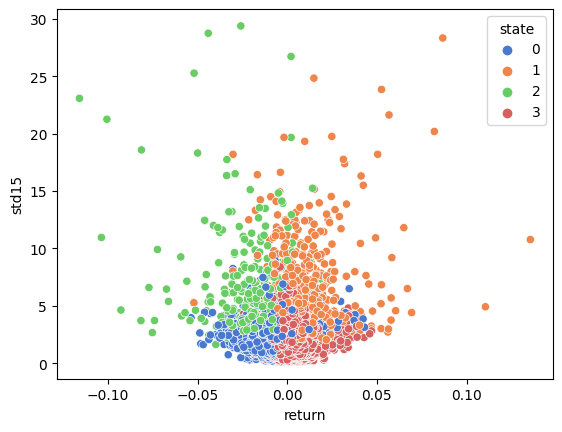

In [90]:
colors = sns.color_palette("muted", 4)
sns.scatterplot(plot_df, y="std15", x="return", hue="state", palette = colors)

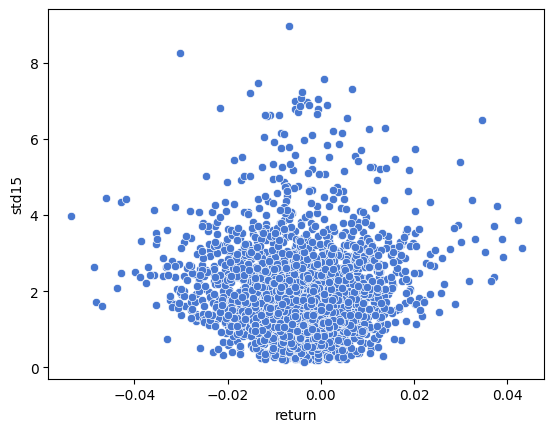

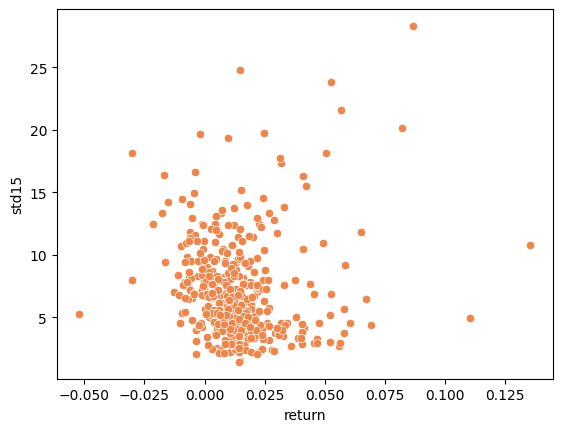

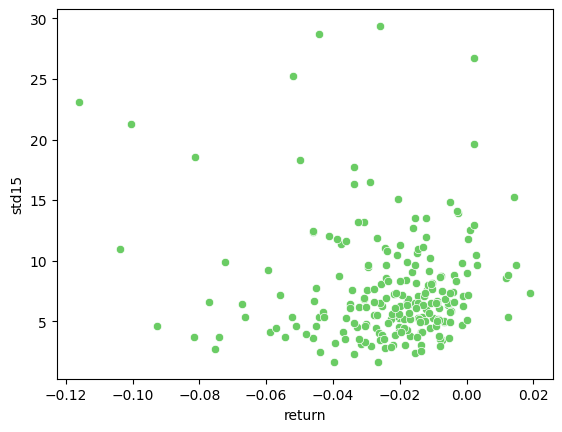

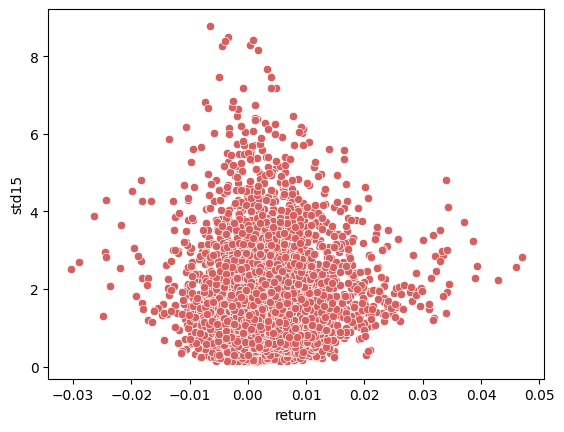

In [92]:
for i in range(0, n_clusters):
    plt.figure()
    sns.scatterplot(y=plot_df[plot_df["state"]==i]["std15"], 
                    x=plot_df[plot_df["state"]==i]["return"], color = colors[i])